<a href="https://colab.research.google.com/github/NIKHILNARSIPALLI/Credit-EDA-Case-Study/blob/main/Pet_Classification_model_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [ ]:
#extracting the data from zip file uploaded in Google collab
from zipfile import ZipFile
file_name = ('/content/data.zip')

with ZipFile(file_name, 'r') as zip:
  zip.extractall()


In [ ]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_images=[]
train_labels=[]

test_images = []
test_labels = []

class_names = ['dog','cat']

for filename in listdir('/content/data/train/cats'):
  output = int(1)
  photo = load_img('/content/data/train/cats/' + filename, target_size=(200, 200))
  photo = img_to_array(photo)
  train_images.append(photo)
  train_labels.append(output)

for filename in listdir('/content/data/train/dogs'):
  output = int(0)
  photo = load_img('/content/data/train/dogs/' + filename, target_size=(200, 200))
  photo = img_to_array(photo)
  train_images.append(photo)
  train_labels.append(output)

for filename in listdir('/content/data/test/cats'):
  output = int(1)
  photo = load_img('/content/data/test/cats/' + filename, target_size=(200, 200))
  photo = img_to_array(photo)
  test_images.append(photo)
  test_labels.append(output)

for filename in listdir('/content/data/test/dogs'):
  output = int(0)
  photo = load_img('/content/data/test/dogs/' + filename, target_size=(200, 200))
  photo = img_to_array(photo)
  test_images.append(photo)
  test_labels.append(output)


train_images = np.asarray(train_images)
test_images = p.asarray(tesnt_images)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [ ]:
train_images.shape

(40, 200, 200, 3)

In [ ]:
train_labels.shape

(40,)

In [ ]:
test_images.shape

(20, 200, 200, 3)

In [ ]:
test_labels.shape

(20,)

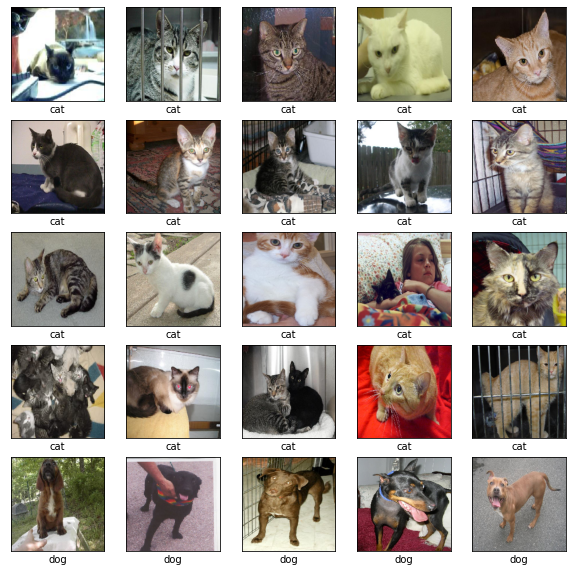

In [ ]:
#checking the first 25 images of training data set
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:

#building the architecture of the model

model = models.Sequential()

#1st layer
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2),strides=2))

#2nd layer
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

#ending with convolutional layer
model.add(layers.Conv2D(64,(5,5),activation='relu'))

#hidden layer
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(2))

model.add(layers.Dropout(0.4))
model.add(layers.Softmax())

In [ ]:
#compliling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fitting the model with 100 epochs
model.fit(train_images,train_labels,epochs=100)

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.7609 - accuracy: 0.4250
Epoch 2/100
2/2 [==============================] - 5s 1s/step - loss: 0.7016 - accuracy: 0.6000
Epoch 3/100
2/2 [==============================] - 5s 1s/step - loss: 0.7573 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 5s 1s/step - loss: 0.7591 - accuracy: 0.5250
Epoch 5/100
2/2 [==============================] - 5s 1s/step - loss: 0.7780 - accuracy: 0.4750
Epoch 6/100
2/2 [==============================] - 5s 1s/step - loss: 0.7614 - accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 5s 1s/step - loss: 0.8428 - accuracy: 0.4500
Epoch 8/100
2/2 [==============================] - 5s 1s/step - loss: 0.7512 - accuracy: 0.4750
Epoch 9/100
2/2 [==============================] - 5s 1s/step - loss: 0.7089 - accuracy: 0.4750
Epoch 10/100
2/2 [==============================] - 5s 1s/step - loss: 0.6869 - accuracy: 0.5250
Epoch 11/100
2/2 [=====================

In [ ]:
#evaluating the model after 100 epochs
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("Accuracy after 100 iteration is ",test_acc)
print("Loss metric after 100 iterations is",test_loss)

1/1 [==============================] - 1s 811ms/step - loss: 0.8049 - accuracy: 0.5000
Accuracy after 100 iteration is  0.5
Loss metric after 100 iterations is 0.8049135208129883


In [ ]:
#fitting the model again with 100 epochs
model.fit(train_images,train_labels,epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.3703 - accuracy: 0.9500
Epoch 2/100
2/2 [==============================] - 5s 1s/step - loss: 0.3513 - accuracy: 0.9500
Epoch 3/100
2/2 [==============================] - 5s 1s/step - loss: 0.3608 - accuracy: 0.9750
Epoch 4/100
2/2 [==============================] - 5s 1s/step - loss: 0.3702 - accuracy: 0.9750
Epoch 5/100
2/2 [==============================] - 5s 1s/step - loss: 0.3323 - accuracy: 0.9750
Epoch 6/100
2/2 [==============================] - 5s 1s/step - loss: 0.3988 - accuracy: 0.9250
Epoch 7/100
2/2 [==============================] - 5s 1s/step - loss: 0.3607 - accuracy: 0.9250
Epoch 8/100
2/2 [==============================] - 5s 1s/step - loss: 0.3513 - accuracy: 0.9250
Epoch 9/100
2/2 [==============================] - 5s 1s/step - loss: 0.3418 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 5s 1s/step - loss: 0.3702 - accuracy: 0.9750
Epoch 11/100
2/2 [=====================

In [ ]:
#evaluating the model after 200 epochs
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("Accuracy after 200 iteration is ",test_acc)
print("Loss metric after 200 iterations is",test_loss)

1/1 [==============================] - 1s 636ms/step - loss: 0.8083 - accuracy: 0.5000
Accuracy after 200 iteration is  0.5
Loss metric after 200 iterations is 0.8083462715148926


In [ ]:
#fitting the model again with 100 epochs
model.fit(train_images,train_labels,epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.4082 - accuracy: 0.9250
Epoch 2/100
2/2 [==============================] - 5s 1s/step - loss: 0.3702 - accuracy: 0.9000
Epoch 3/100
2/2 [==============================] - 5s 1s/step - loss: 0.3987 - accuracy: 0.8750
Epoch 4/100
2/2 [==============================] - 5s 1s/step - loss: 0.3323 - accuracy: 0.9750
Epoch 5/100
2/2 [==============================] - 5s 1s/step - loss: 0.3892 - accuracy: 0.9250
Epoch 6/100
2/2 [==============================] - 5s 1s/step - loss: 0.3797 - accuracy: 0.9250
Epoch 7/100
2/2 [==============================] - 5s 1s/step - loss: 0.3797 - accuracy: 0.8500
Epoch 8/100
2/2 [==============================] - 5s 1s/step - loss: 0.3892 - accuracy: 0.9250
Epoch 9/100
2/2 [==============================] - 5s 1s/step - loss: 0.3607 - accuracy: 0.9250
Epoch 10/100
2/2 [==============================] - 5s 1s/step - loss: 0.3797 - accuracy: 0.8500
Epoch 11/100
2/2 [=====================

In [ ]:
#evaluating the model after 300 epochs
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("Accuracy after 300 iteration is ",test_acc)
print("Loss metric after 300 iterations is",test_loss)

1/1 [==============================] - 1s 667ms/step - loss: 0.8085 - accuracy: 0.5000
Accuracy after 300 iteration is  0.5
Loss metric after 300 iterations is 0.8084942102432251
